### **Objective**
Build a multiple linear regression model for the prediction of demand for shared bikes. 

### **Problem Statement**

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

### **Business Goal**

Find variables are significant in predicting the demand for shared bikes and how well those variables describe the bike demands
Based on various **meteorological surveys** and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Based on the goal mentioned above, model the demand for shared bikes with the available independent variables.

### **Data Caveats**

1.   In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as described in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

2.  The column 'yr' has two values 0 and 1 indicating the years 2018 and 2019 respectively. Since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. m


### **Model Building**

In the dataset provided,there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. ***The model should be built taking this 'cnt' as the target variable.***

### **Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ML Libs

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

### **Step 2: Import Data**

In [3]:
# Reading the dataset
df_bike = pd.read_csv("day.csv")

In [4]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### **Step3. Data Understanding and Exploration**

In [5]:
#check dataframe information
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
## Shape
df_bike.shape

(730, 16)

In [7]:
## Columns
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
df_bike['dtemodified']=pd.to_datetime(df_bike['dteday'],format='%d-%m-%Y')

In [10]:
df_bike['dtemodified_month']=pd.DatetimeIndex(df_bike['dtemodified']).month

In [11]:
df_bike=df_bike.drop(columns=['dtemodified','dtemodified_month'])

In [12]:
# convert 'dteday' from 'object' to 'datetime'
df_bike['dteday']=pd.to_datetime(df_bike['dteday'],format='%d-%m-%Y')

In [13]:
df_bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# **Data Dictionary**
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [14]:
## Check for Null
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
df_bike['mnth']=pd.to_datetime(df_bike['mnth'],format='%m').dt.month_name()
#df_bike['month_full'] = df_bike['mnth'].dt.month_name()


In [16]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
df_bike['mnth'].astype('category').value_counts()

August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
February     56
Name: mnth, dtype: int64

In [17]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def weekday_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
df_bike[['weekday']] = df_bike[['weekday']].apply(weekday_map)

In [18]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekday
df_bike['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [19]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,January,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,January,0,Tues,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,January,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,January,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,January,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
#+ weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df_bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
# mapping the values in 'weathersit' to string values as given in the data dictionary

df_bike['weathersit'] = df_bike['weathersit'].map({1:'Clear',
                                     2:'Mist',
                                     3:'Light rain',
                                     4:'Heavy rain'})

# mapping the values in 'season' to string values as given in the data dictionary

df_bike['season'] = df_bike['season'].map({1:'Spring',
                             2:'Summer',
                             3:'Fall',
                             4:'Winter'})

###### ***Data Validation*** 

In [22]:
## Check for Humdity <=0

df_bike[df_bike['hum'] <= 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2018-03-10,Spring,0,March,0,Sat,1,Light rain,15.952731,19.2834,0.0,17.545759,46,577,623


Observations:
- Humidity can never be zero. Hence this is a anomaly data and need to be removed

In [23]:
df_bike = df_bike[df_bike['hum'] > 0]

In [24]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,January,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,Spring,0,January,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,Spring,0,January,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Spring,0,January,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Spring,0,January,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
df_bike.nunique().sort_values(ascending=False).head()

instant       729
dteday        729
cnt           694
atemp         688
registered    677
dtype: int64

Observations & Action:
- columns "instant" are system generated index and are not relevant for our analysis. Hence removing them

In [26]:
df_bike=df_bike.drop(columns='instant',axis=1)

### A Quick Glance on Univariate Analysis

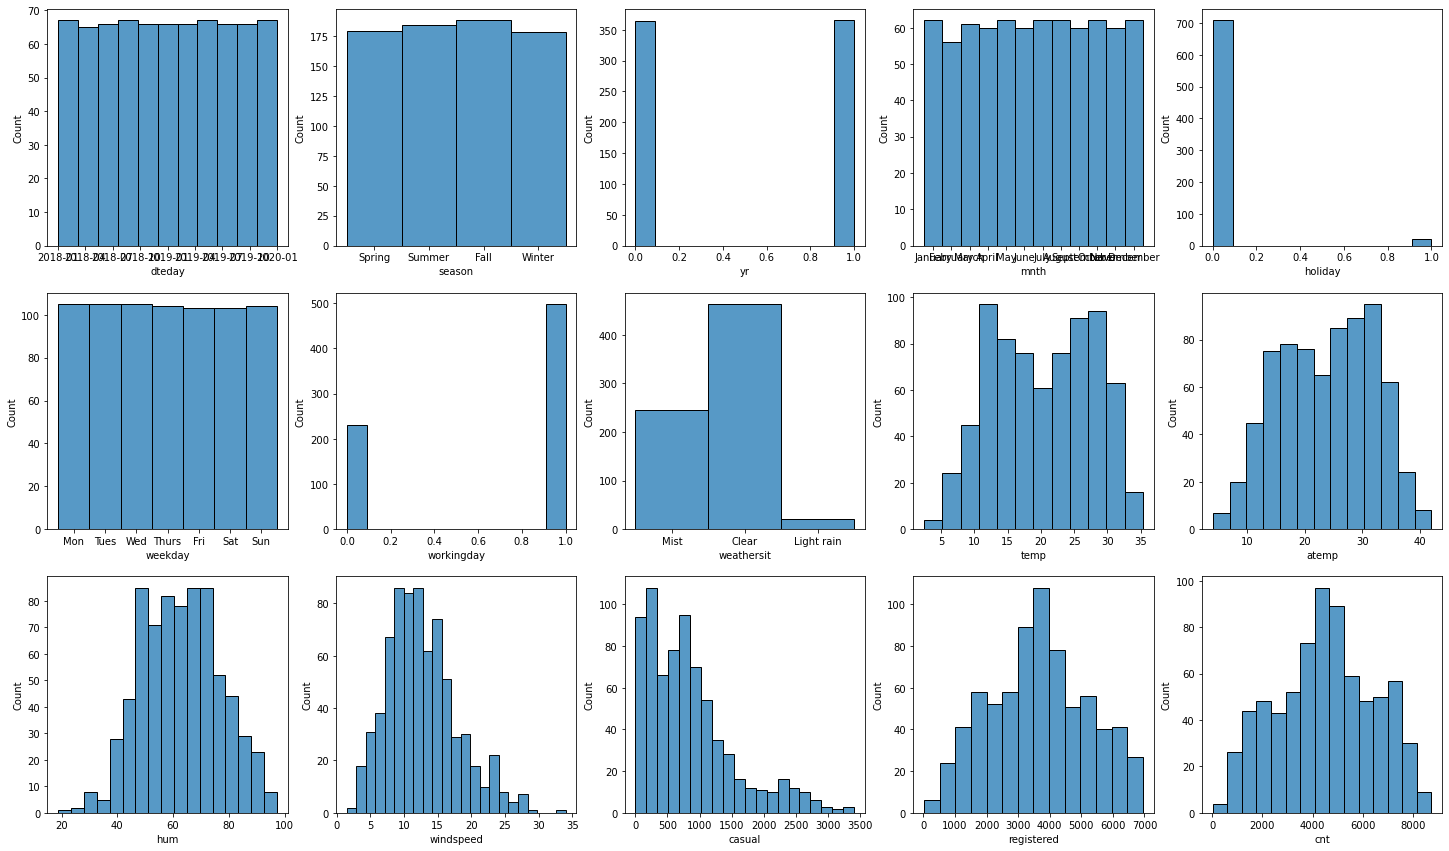

In [27]:
cols = 5
rows = 4
num_cols = df_bike.columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df_bike[col], ax = ax)
    
#fig.tight_layout()  
plt.show()

### Plotting the numerical variables

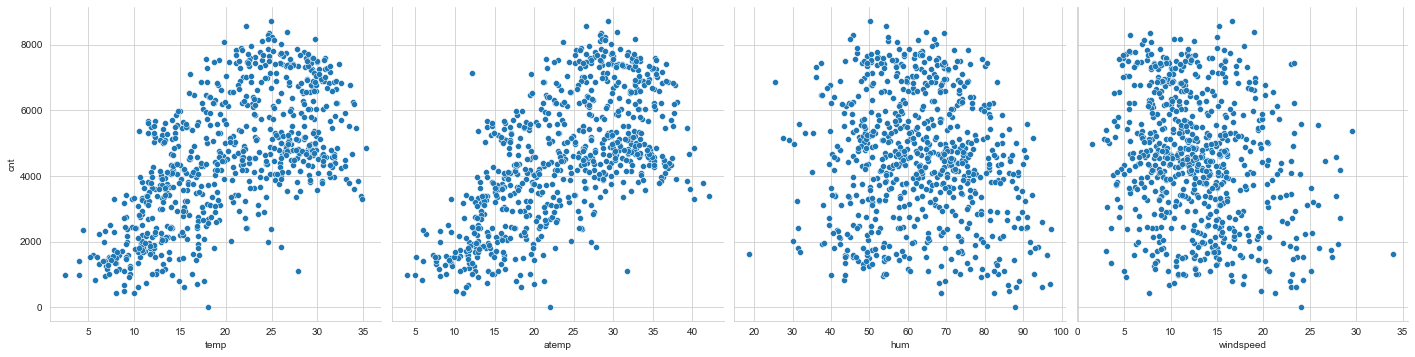

In [28]:
# plotting the above 4 variables against 'cnt' to check for a linear relationship

sns.set_style('whitegrid')
sns.pairplot(df_bike,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',
             diag_kind=None,height=5,aspect=1);

Observations:
- With 'temp' and 'atemp' there seems to be an increasing trend with 'cnt'.
- 'temp' and 'atemp' looks quite similar. 

##### Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable? 

In [29]:
df_bike.dtypes

dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

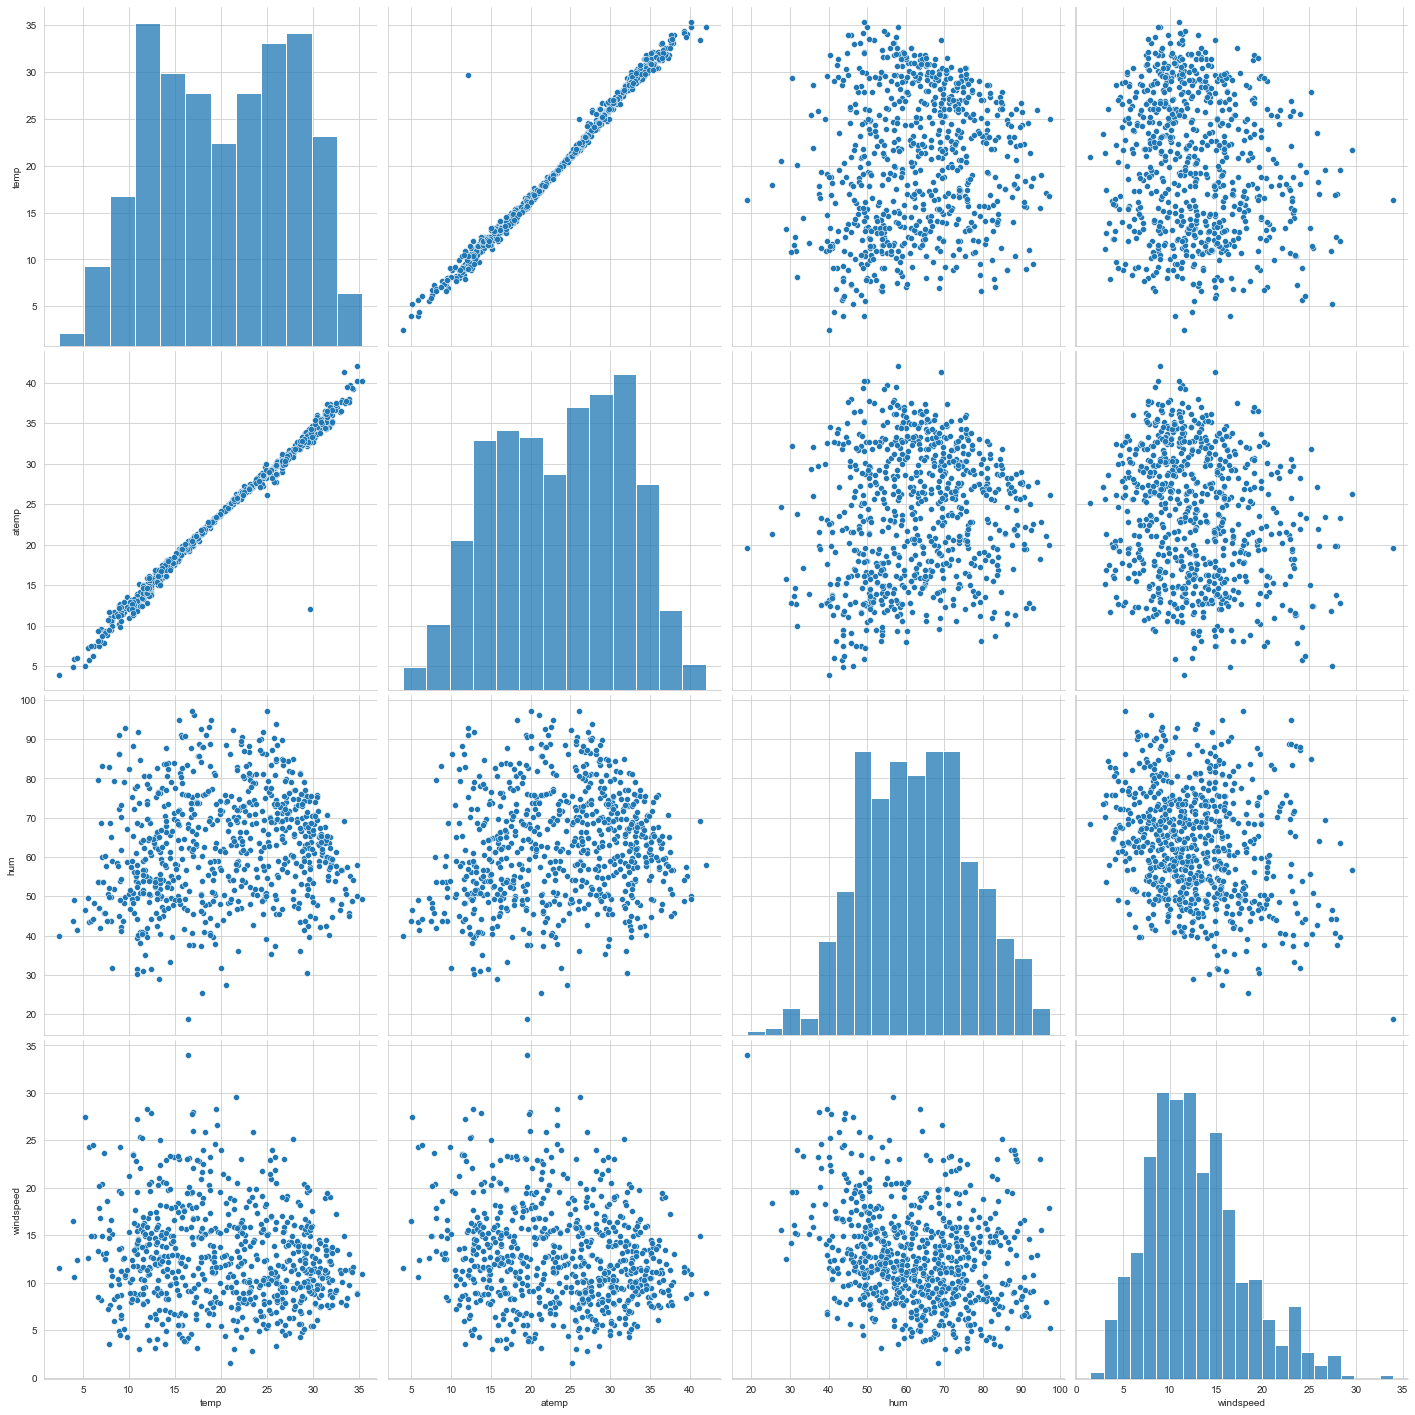

In [30]:
sns.pairplot(df_bike.select_dtypes(include=['float64']),
             height=5,aspect=1);

##### * Analysis on Column: atemp & temp

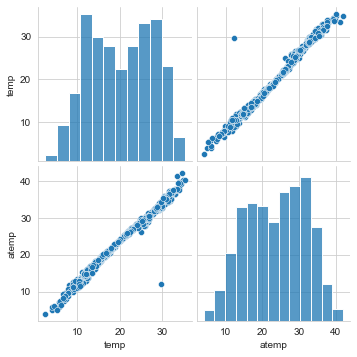

In [31]:
sns.pairplot(df_bike[['temp','atemp']])
plt.show()

Observations:
- 'temp' and 'atemp' looks quite similar. 

Inference:
- Predictor columns temp and atemp are very much correlated to each other, so we can drop any one of them, here we are dropping atemp variable.

In [32]:
#Droping the atemp variable:
df_bike=df_bike.drop(['atemp'],axis=1)

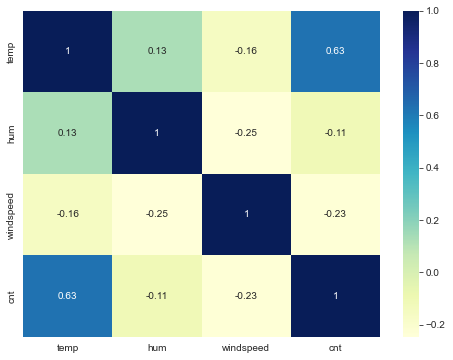

In [33]:
# looking at the correlation between the other numerical variables

plt.figure(figsize=(8,6))
sns.heatmap(df_bike[['temp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu');

There is no significant correlation between temp and hum, windspeed. Hence, they are left as it is.

###  Plotting the categorical variables 

In [34]:
# Checking for unique values in the categorical columns to make sure there aren't any disguised missing values:

categ_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for x in categ_vars:
    print('Unique values in ', x, df_bike[x].unique())

Unique values in  season ['Spring' 'Summer' 'Fall' 'Winter']
Unique values in  yr [0 1]
Unique values in  mnth ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Unique values in  holiday [0 1]
Unique values in  weekday ['Mon' 'Tues' 'Wed' 'Thurs' 'Fri' 'Sat' 'Sun']
Unique values in  workingday [0 1]
Unique values in  weathersit ['Mist' 'Clear' 'Light rain']


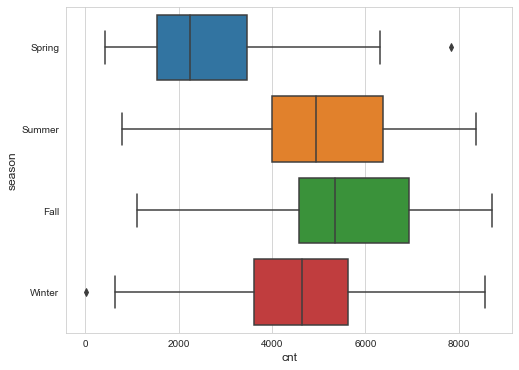

In [35]:
# plotting 'cnt' vs 'season'
plt.figure(figsize=(8,6))
plt.xlabel('cnt',fontsize=12)
plt.ylabel('season',fontsize=12)
sns.boxplot('cnt','season',data=df_bike)
plt.show()

Observation:
- Fall season seems to have the highest median when compared to others, closesly followed by Summer and Winter.
- Spring season doesn't seem to attract many customers.


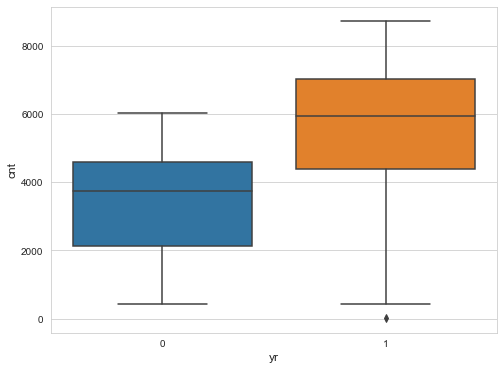

In [36]:
# plotting 'cnt' vs 'yr'
plt.figure(figsize=(8,6))
plt.xlabel('yr',fontsize=12)
plt.ylabel('cnt',fontsize=12)
sns.boxplot('yr','cnt',data=df_bike)
plt.show()



Observation:
 - The year 2019 has recorded a median increase of 2000 customers when compared to the previous year of 2018.

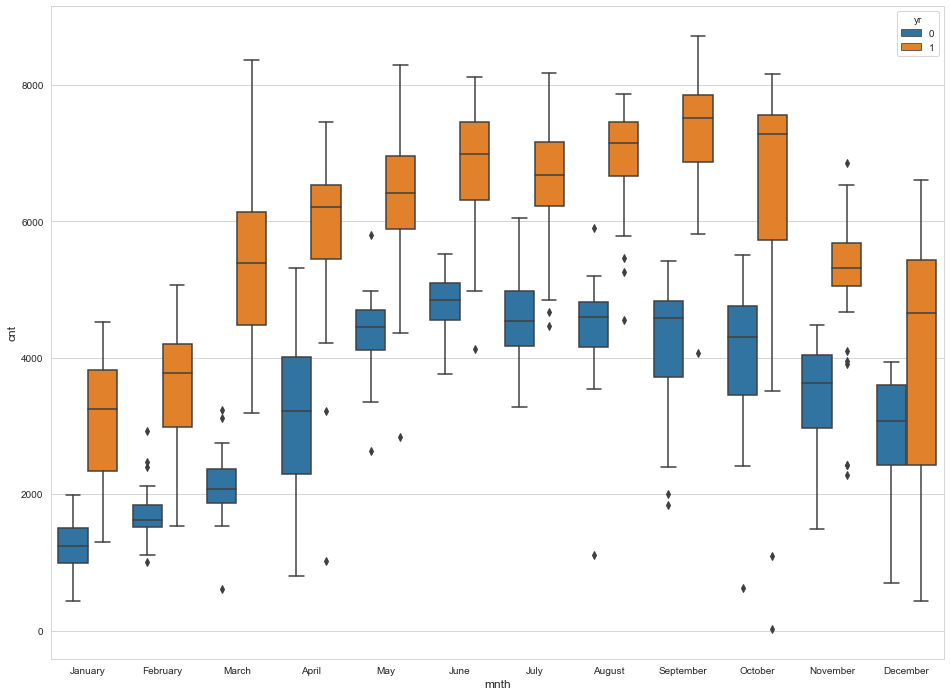

In [37]:
# plotting 'cnt' vs 'mnth'
plt.figure(figsize=(16,12))
plt.xlabel('cnt',fontsize=12)
plt.ylabel('mnth',fontsize=12)
sns.boxplot('mnth','cnt',hue='yr',data=df_bike)
plt.show()

Observation:
In general, May-October Months seems to have more rentals than the rest of the year.

In [38]:
df_bike.groupby(by=['mnth','yr'])['cnt'].max()

mnth       yr
April      0     5312
           1     7460
August     0     5895
           1     7865
December   0     3940
           1     6606
February   0     2927
           1     5062
January    0     1985
           1     4521
July       0     6043
           1     8173
June       0     5515
           1     8120
March      0     3239
           1     8362
May        0     5805
           1     8294
November   0     4486
           1     6852
October    0     5511
           1     8156
September  0     5423
           1     8714
Name: cnt, dtype: int64

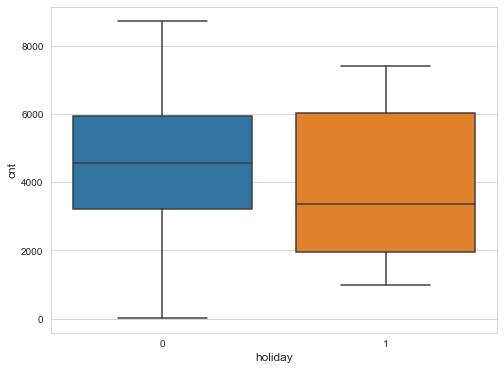

In [39]:
# # plotting 'cnt' vs 'holiday'
plt.figure(figsize=(8,6))
plt.xlabel('holiday',fontsize=12)
plt.ylabel('cnt',fontsize=12)
sns.boxplot('holiday','cnt',data=df_bike)
plt.show()

Observation:
During the holidays, less people seem to rent a bike since the median has dropped by 2000 approx. Another point to be noted is that there is a lot more variability in rentals during the holidays.

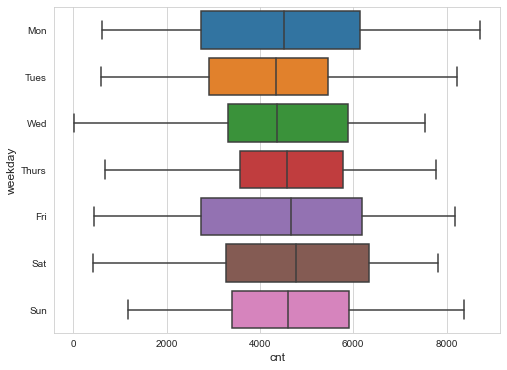

In [40]:
# plotting 'cnt' vs 'weekday'
plt.figure(figsize=(8,6))
plt.xlabel('cnt',fontsize=12)
plt.ylabel('weekday',fontsize=12)
sns.boxplot('cnt','weekday',data=df_bike)
plt.show()

Observation:
There is no significant difference in the median values among the different weekdays. Thursday seems to have the highest median among the other days.

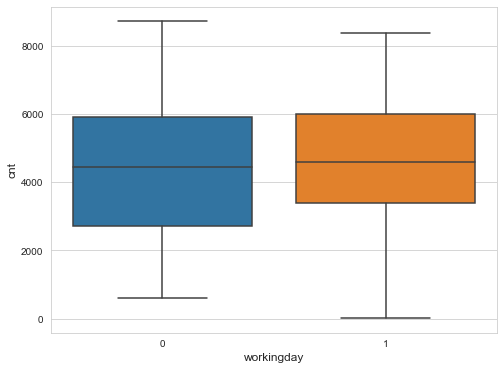

In [41]:
# plotting 'cnt' vs 'workingday'
plt.figure(figsize=(8,6))
plt.xlabel('workingday',fontsize=12)
plt.ylabel('cnt',fontsize=12)
sns.boxplot('workingday','cnt',data=df_bike)
plt.show()

Observation:
There is no much difference if the given day is a working day or a weekend or a holiday. The median and the interquartile range seems identical.

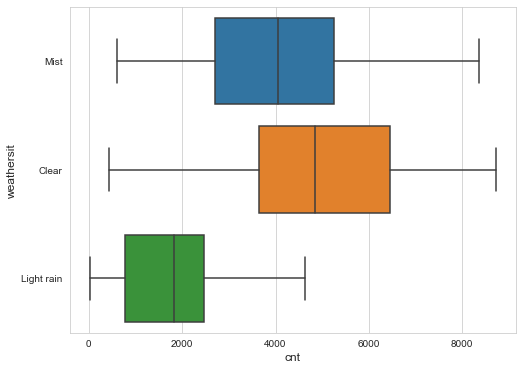

In [42]:
# plotting 'cnt' vs 'weathersit'
plt.figure(figsize=(8,6))
plt.xlabel('cnt',fontsize=12)
plt.ylabel('weathersit',fontsize=12)
sns.boxplot('cnt','weathersit',data=df_bike)
plt.show()

Observation:
As seen in the above plot, when the weather is Clear, the most no. of rentals take place, followed by when there is Mist.
When there is Light rain, very low no. of customers seem to rent a bike

### Observations Summary
<h4><font color = green >Observations from above boxplots for categorical variables: 
    <li> The year box plots indicates that more bikes are rent during 2019.</li>
    <li> The season box plots indicates that more bikes are rent during fall season.</li>
    <li> The working day and holiday box plots indicate that more bikes are rent during normal working days than on weekends or holidays.</li>
    <li> The month box plots indicates that more bikes are rent during september month. </li>
    <li> The weekday box plots indicates that more bikes are rent during saturday. </li>
    <li> The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.</li>
    </font></h4>

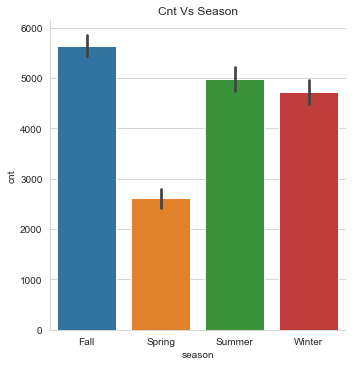

In [43]:
plot_order=sorted(df_bike['season'].unique())
ax = sns.catplot(x="season", y="cnt", data=df_bike,kind="bar",order=plot_order)
ax.set(title='Cnt Vs Season')
plt.show()

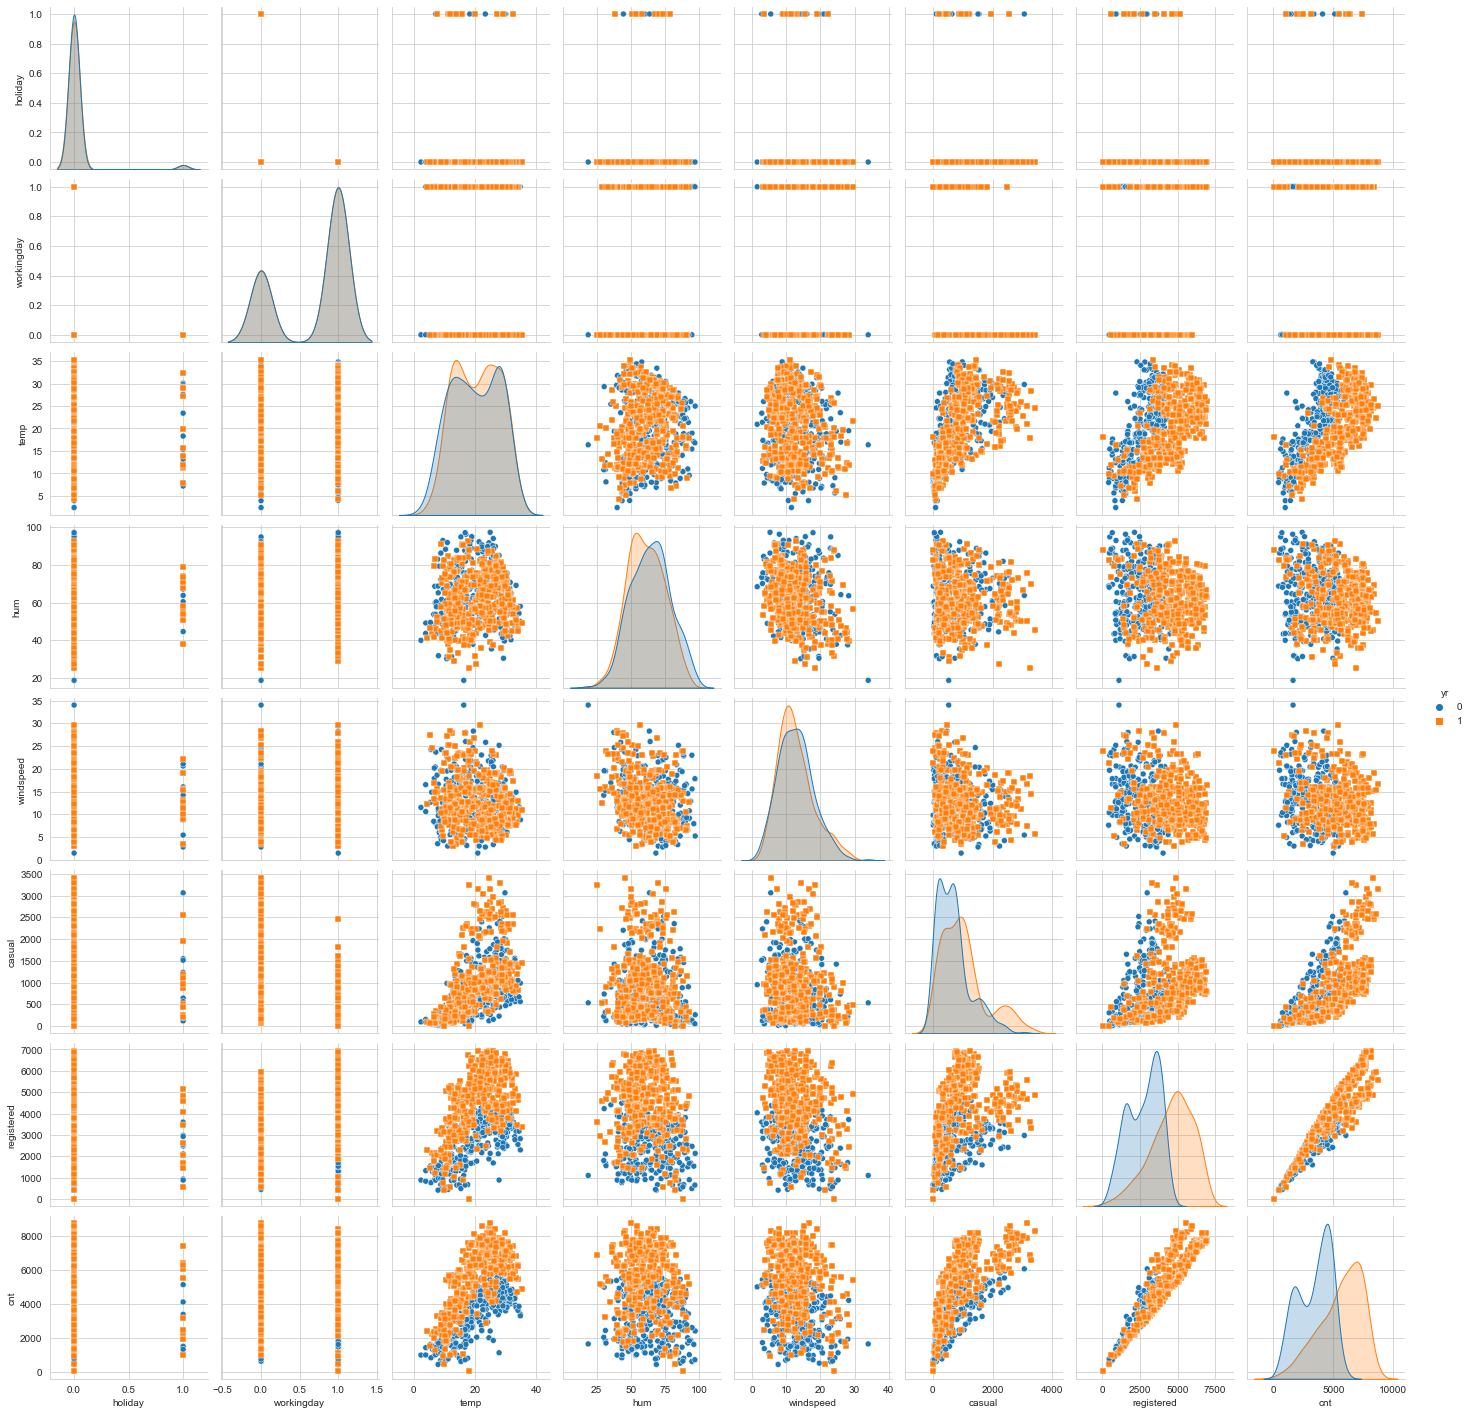

In [44]:
#cols_to_plot = df_bikeshare.columns[8:15].tolist() + ['yr'] # explicitly add the column "yr" to your list of columns to plot
sns.pairplot(df_bike, hue ="yr", markers=["o", "s"])
plt.show()

##### dteday is dateTime is already converted to features of interest such as Year, Month, working Day, weekend . Hence this can be removed


In [45]:
df_bike=df_bike.drop(['dteday'],axis=1)

### Correlation Matrix and Heat Map

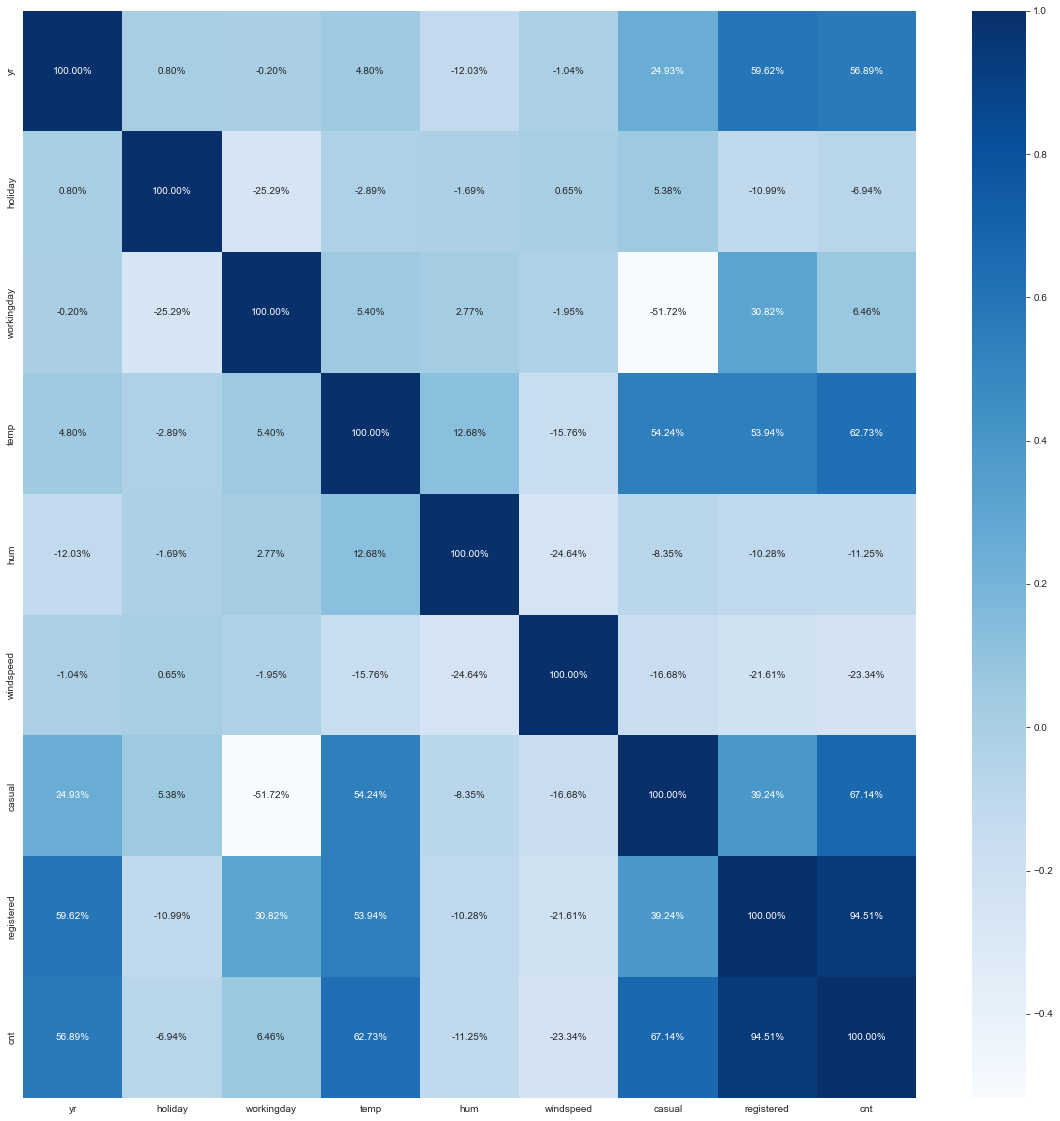

In [46]:
plt.figure(figsize=[20,20])
sns.heatmap(df_bike.corr(),annot=True,cmap="Blues", fmt='.2%', )
plt.show()

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'temp'(also 'atemp'). We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- A high correlation can be seen in between 'cnt' and 'temp' closely followed by 'cnt' and 'yr'.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

- Count is negatively correlated to 'Weather' (-0.30 approximately). This gives us an impression that the shared bikes demand will depened on Weather conditions.



### Data Preparation

- The given data must be prepared before a linear model can be built from it.
- Categorical variables will need to converted into numerical values with the help of dummy variables

In [47]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,Spring,0,January,0,Mon,0,Mist,14.110847,80.5833,10.749882,331,654,985
1,Spring,0,January,0,Tues,0,Mist,14.902598,69.6087,16.652113,131,670,801
2,Spring,0,January,0,Wed,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,Spring,0,January,0,Thurs,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,Spring,0,January,0,Fri,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


- 'season', 'mnth', 'weekday', 'weathersit' columns had categorical data that were converted into strings.
- Since a linear model cannot compute with string values, these columns will have to be converted into indicator variables with the help of dummy values.
- After creating the dummy values, the first column can be dropped because a categorical variable with 'k' levels can be explained perfectly with 'k-1' levels.
- Why LabelEncoder was not used instead of dummy variable?
 - LabelEncoder is used when the categorical variables are ordinal i.e. if you are converting severity or ranking, then LabelEncoding "High" as 2 and "low" as 1 would make sense


In [48]:
# creating dummy values for the following columns

seasons = pd.get_dummies(df_bike['season'],drop_first=True)
months = pd.get_dummies(df_bike['mnth'],drop_first=True)
weekdays = pd.get_dummies(df_bike['weekday'],drop_first=True)
weather = pd.get_dummies(df_bike['weathersit'],drop_first=True)

- Since the above process created 4 new dataframes, they will have to be added to the original dataframe.

In [49]:
df_bike = pd.concat([df_bike,seasons,months,weekdays,weather],axis=1)


In [50]:
df_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Light rain',
       'Mist'],
      dtype='object')

In [51]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,October,September,Mon,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist
0,Spring,0,January,0,Mon,0,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,January,0,Tues,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,January,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,January,0,Thurs,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,January,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


Now that the dummy variables have been created, the original columns can be dropped before proceeding to model building.

In [52]:

df_bike = df_bike.drop(['season','mnth','weekday','weathersit'],axis=1)

In [53]:

df_bike.shape

(729, 31)

In [54]:
df_bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'Spring', 'Summer', 'Winter', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed',
       'Light rain', 'Mist'],
      dtype='object')

In [55]:
df_bike.head().T

,0,1,2,3,4
yr,0.000000,0.000000,0.000000,0.000000,0.000000
holiday,0.000000,0.000000,0.000000,0.000000,0.000000
workingday,0.000000,0.000000,1.000000,1.000000,1.000000
temp,14.110847,14.902598,8.050924,8.200000,9.305237
hum,80.583300,69.608700,43.727300,59.043500,43.695700
windspeed,10.749882,16.652113,16.636703,10.739832,12.522300
casual,331.000000,131.000000,120.000000,108.000000,82.000000
registered,654.000000,670.000000,1229.000000,1454.000000,1518.000000
cnt,985.000000,801.000000,1349.000000,1562.000000,1600.000000
Spring,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [56]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_bike, train_size=0.7, test_size=0.3, random_state=100)

In [57]:
df_train.head().T

,626,364,426,728,482
yr,1.000000,0.000000,1.000000,1.000000,1.000000
holiday,0.000000,0.000000,0.000000,0.000000,0.000000
workingday,1.000000,0.000000,0.000000,0.000000,0.000000
temp,22.652500,16.810000,16.980847,10.489153,15.443347
hum,53.666700,61.583300,62.125000,48.333300,48.958300
windspeed,14.416725,14.750318,10.792293,23.500518,8.708325
casual,788.000000,665.000000,956.000000,364.000000,1120.000000
registered,6803.000000,1820.000000,3110.000000,1432.000000,3100.000000
cnt,7591.000000,2485.000000,4066.000000,1796.000000,4220.000000
Spring,0.000000,1.000000,1.000000,1.000000,0.000000


1. 'cnt' is the target variable also known as the dependent variable.
2. Other variables such as 'temp', 'hum' and 'windspeed' are independent variables.

### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [58]:
df_train.dtypes

yr              int64
holiday         int64
workingday      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
Spring          uint8
Summer          uint8
Winter          uint8
August          uint8
December        uint8
February        uint8
January         uint8
July            uint8
June            uint8
March           uint8
May             uint8
November        uint8
October         uint8
September       uint8
Mon             uint8
Sat             uint8
Sun             uint8
Thurs           uint8
Tues            uint8
Wed             uint8
Light rain      uint8
Mist            uint8
dtype: object

In [59]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [60]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])



In [61]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.511765,0.500352,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.027451,0.163554,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.674510,0.469018,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.540678,0.225277,0.0,0.350497,0.540519,0.742223,1.0
hum,510.0,0.571669,0.182541,0.0,0.431818,0.575578,0.704680,1.0
windspeed,510.0,0.318011,0.170567,0.0,0.192829,0.296767,0.414082,1.0
casual,510.0,0.248277,0.201345,0.0,0.090635,0.213614,0.324757,1.0
registered,510.0,0.501209,0.242549,0.0,0.320253,0.499464,0.683499,1.0
cnt,510.0,0.496352,0.235715,0.0,0.333213,0.498008,0.685832,1.0
Spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0


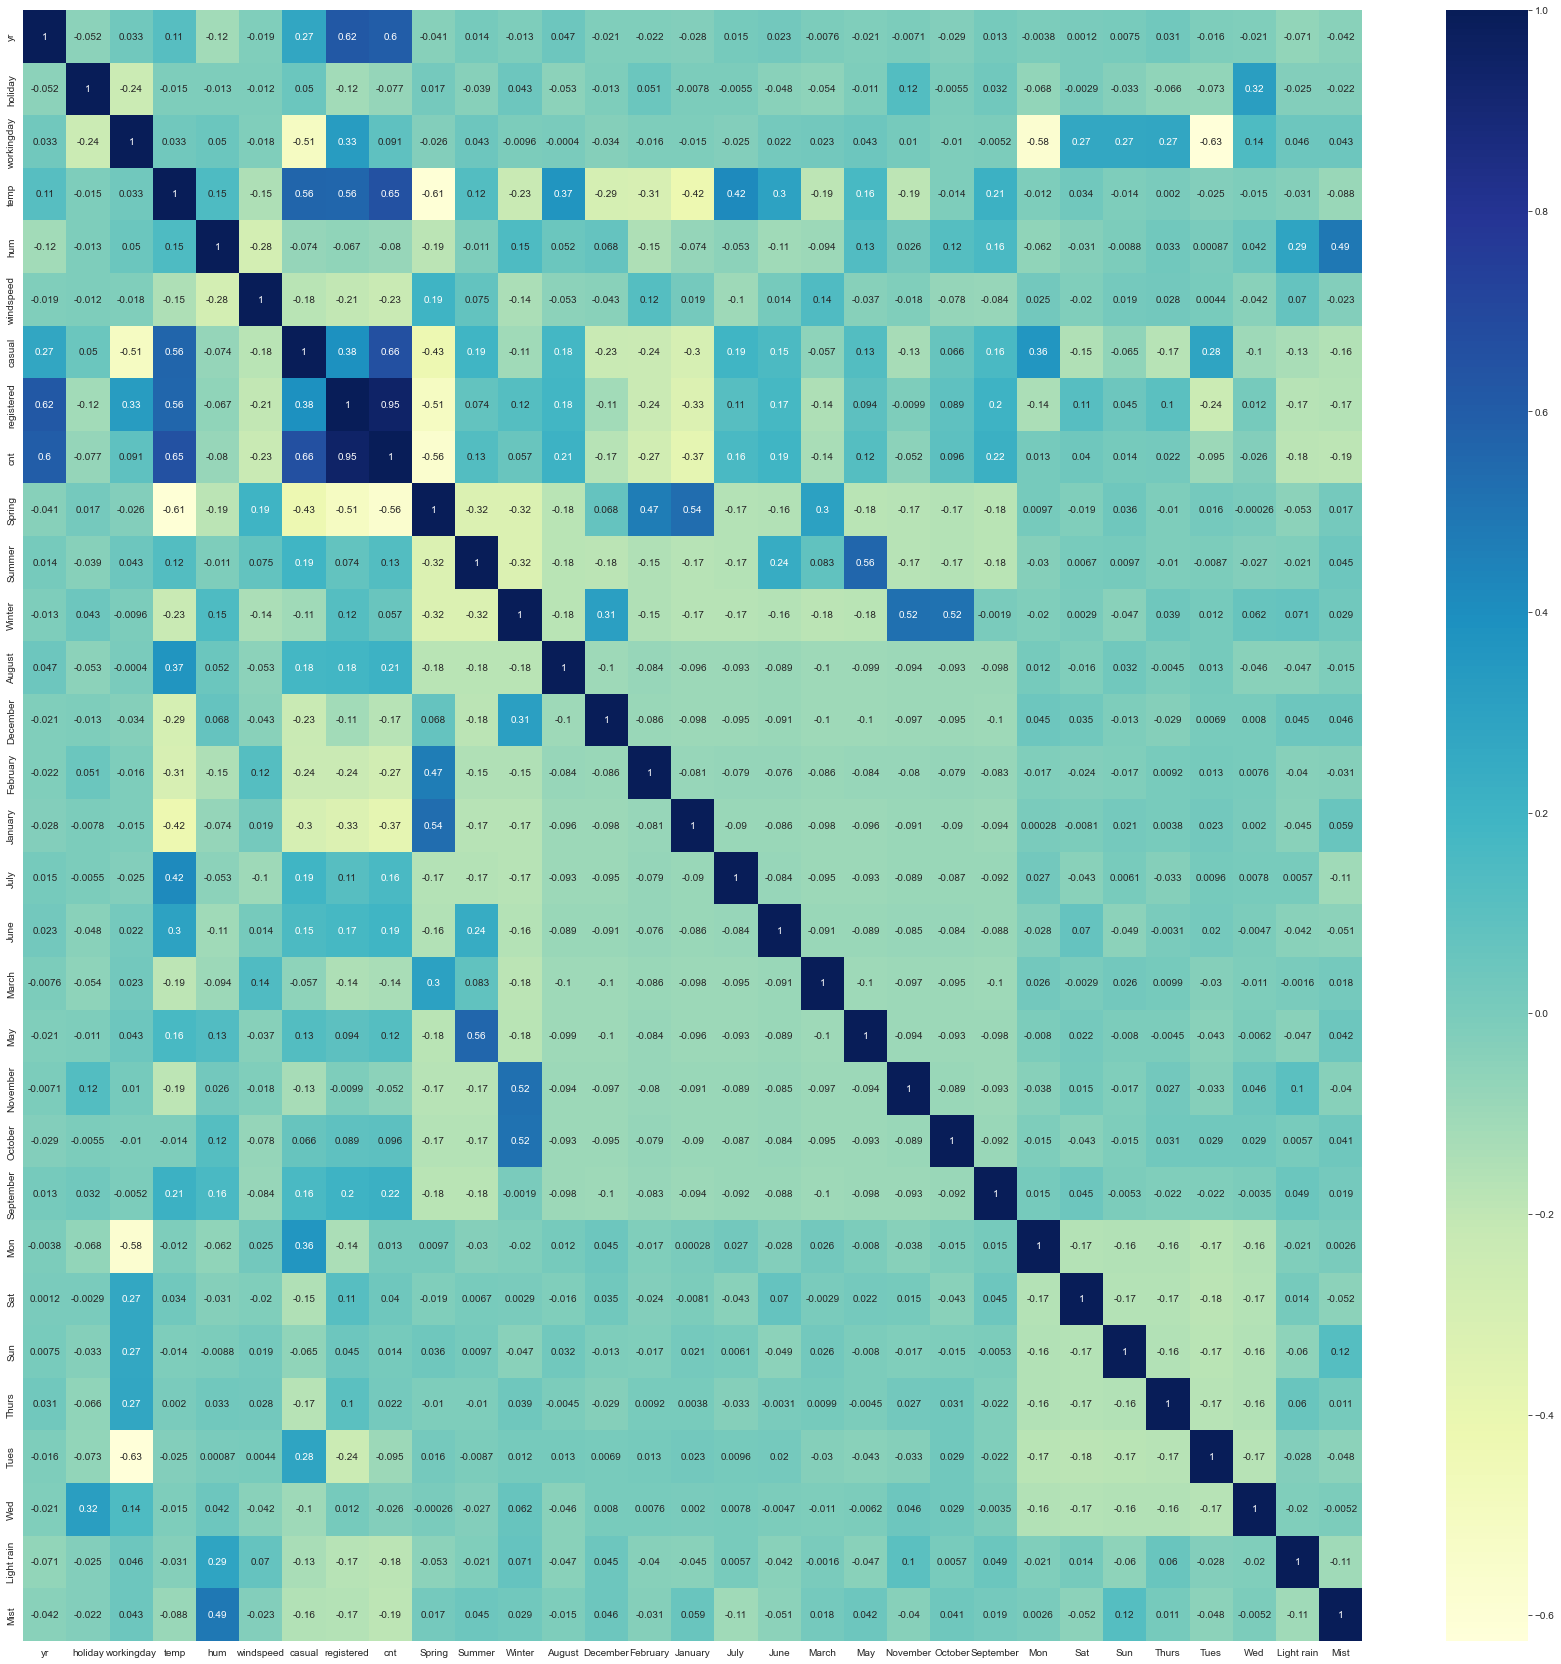

In [62]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [63]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [64]:
y_train.head()

626    0.864421
364    0.247978
426    0.438851
728    0.164795
482    0.457443
Name: cnt, dtype: float64

In [65]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,August,...,October,September,Mon,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist
626,1,0,1,0.614763,0.450242,0.371638,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
364,0,0,0,0.437201,0.552447,0.382342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.559440,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.381387,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.389456,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [66]:
X_train.shape

(510, 28)

Approach:
    
    - Build a Linear Regression Model with RFE 
    - Build a Stats Model usingg RFE selected variables 
    - Evaluate Model Summary and VIF

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,15) # Running RFE
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 6),
 ('Winter', True, 1),
 ('August', False, 10),
 ('December', False, 2),
 ('February', False, 4),
 ('January', False, 3),
 ('July', True, 1),
 ('June', False, 9),
 ('March', False, 7),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 11),
 ('September', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 12),
 ('Sun', False, 8),
 ('Thurs', False, 13),
 ('Tues', True, 1),
 ('Wed', False, 14),
 ('Light rain', True, 1),
 ('Mist', True, 1)]

In [69]:
# Variables Used
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'July', 'November', 'September', 'Mon', 'Tues', 'Light rain',
       'Mist'],
      dtype='object')

In [70]:
# Variables Not Used
X_train.columns[~rfe.support_]


Index(['Summer', 'August', 'December', 'February', 'January', 'June', 'March',
       'May', 'October', 'Sat', 'Sun', 'Thurs', 'Wed'],
      dtype='object')

### Model 1 (using statsmodel)



In [71]:

X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Mon',
       'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Light rain', 'Mist'],
      dtype='object')

In [72]:
#Creating X_train cols based on RFE selected variables
X = X_train[col]

In [73]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'July', 'November', 'September', 'Mon', 'Tues', 'Light rain',
       'Mist'],
      dtype='object')

In [74]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X)

lr_sm1 = sm.OLS(y_train, X_train_sm).fit()

lr_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.09e-191
Time:                        20:43:48   Log-Likelihood:                 491.47
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     495   BIC:                            -889.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1946      0.023      8.509      0.000       0.150       0.240
yr             0.2359      0.009     27.739      0.000       0.219       0.253
holiday     4.532e-05      0.021      0.002      0.998      -0.042       0.042
workingday     0.0828      0.009      9.126      0.000       0.065       0.101
temp           0.5254      0.032     16.210      0.000       0.462       0.589
hum           -0.1514      0.033     -4.656      0.000      -0.215      -0.088
windspeed     -0.1650      0.027     -6.170      0.000      -0.218      -0.112
Spring        -0.1123      0.016     -7.178      0.000      -0.143      -0.082
Winter         0.0740      0.014      5.410      0.000       0.047       0.101
July          -0.0831      0.018     -4.718      0.000      -0.118      -0.048
November      -0.0396      0.018     -2.169      0.031      -0.075      -0.004
September      0.0620      0.015      3.999      0.000       0.032       0.092
Mon            0.0828      0.012      7.115      0.000       0.060       0.106
Tues           0.0289      0.012      2.509      0.012       0.006       0.052
Light rain    -0.2026      0.033     -6.203      0.000      -0.267      -0.138
Mist          -0.0520      0.011     -4.699      0.000      -0.074      -0.030
==============================================================================
Omnibus:                       60.726   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.643
Skew:                          -0.600   Prob(JB):                     5.86e-35
Kurtosis:                       5.445   Cond. No.                     2.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
#pvalues > 0.05 

lr_sm1.pvalues[round(lr_sm1.pvalues,4) > 0.05]

holiday    0.998313
dtype: float64

In [76]:
lr_sm1.rsquared

0.8463359149810471

In [77]:
lr_sm1.rsquared_adj

0.8419898600512181

#### Checking VIF

In [78]:
# importing the required library to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,30.91
12,Tues,8.06
11,Mon,6.91
3,temp,3.09
6,Spring,2.62
1,holiday,2.28
4,hum,2.04
7,Winter,2.02
14,Mist,1.61
9,November,1.46


In [80]:
# VIF >10 - should be eliminated
# VIF >5 - can be okay, but worth inspecting
# VIF < 5 - is good


vif[vif['VIF'] > 10]





,Features,VIF
2,workingday,30.91


<b>Observation & Action from Model #1 </b>
- The 'workingday' column can be dropped since it has a high p-value as well as a high VIF.

### Model 2 (using statsmodel)



In [81]:

X = X.drop(['workingday'],axis=1)

In [82]:
X.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter', 'July',
       'November', 'September', 'Mon', 'Tues', 'Light rain', 'Mist'],
      dtype='object')

In [83]:
X_train_sm = sm.add_constant(X)
lr_sm2 = sm.OLS(y_train,X_train_sm).fit()
lr_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.09e-191
Time:                        20:43:48   Log-Likelihood:                 491.47
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     495   BIC:                            -889.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2774      0.028      9.879      0.000       0.222       0.333
yr             0.2359      0.009     27.739      0.000       0.219       0.253
holiday       -0.0828      0.026     -3.198      0.001      -0.134      -0.032
temp           0.5254      0.032     16.210      0.000       0.462       0.589
hum           -0.1514      0.033     -4.656      0.000      -0.215      -0.088
windspeed     -0.1650      0.027     -6.170      0.000      -0.218      -0.112
Spring        -0.1123      0.016     -7.178      0.000      -0.143      -0.082
Winter         0.0740      0.014      5.410      0.000       0.047       0.101
July          -0.0831      0.018     -4.718      0.000      -0.118      -0.048
November      -0.0396      0.018     -2.169      0.031      -0.075      -0.004
September      0.0620      0.015      3.999      0.000       0.032       0.092
Mon        -8.669e-06      0.012     -0.001      0.999      -0.024       0.024
Tues          -0.0539      0.012     -4.631      0.000      -0.077      -0.031
Light rain    -0.2026      0.033     -6.203      0.000      -0.267      -0.138
Mist          -0.0520      0.011     -4.699      0.000      -0.074      -0.030
==============================================================================
Omnibus:                       60.726   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.643
Skew:                          -0.600   Prob(JB):                     5.86e-35
Kurtosis:                       5.445   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#pvalues > 0.05 

lr_sm2.pvalues[round(lr_sm2.pvalues,4) > 0.05]

Mon    0.999436
dtype: float64

#### Checking VIF

In [85]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.48
2,temp,13.65
4,windspeed,4.19
13,Mist,2.43
5,Spring,2.35
6,Winter,2.31
0,yr,2.10
8,November,1.58
7,July,1.44
12,Light rain,1.30


In [86]:
# VIF >10 - should be eliminated
# VIF >5 - can be okay, but worth inspecting
# VIF < 5 - is good


vif[vif['VIF'] > 10]

,Features,VIF
3,hum,16.48
2,temp,13.65


- Removing 'hum' because it has a high VIF.


### Model 3 (using statsmodel)

In [87]:
X = X.drop(['hum'],axis=1)

In [88]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Spring', 'Winter', 'July',
       'November', 'September', 'Mon', 'Tues', 'Light rain', 'Mist'],
      dtype='object')

In [89]:
X_train_sm = sm.add_constant(X)
lr_sm3=sm.OLS(y_train,X_train_sm).fit()
lr_sm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.63e-187
Time:                        20:43:49   Log-Likelihood:                 480.54
No. Observations:                 510   AIC:                            -933.1
Df Residuals:                     496   BIC:                            -873.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2114      0.025      8.545      0.000       0.163       0.260
yr             0.2415      0.009     28.104      0.000       0.225       0.258
holiday       -0.0817      0.026     -3.093      0.002      -0.134      -0.030
temp           0.4873      0.032     15.224      0.000       0.424       0.550
windspeed     -0.1242      0.026     -4.815      0.000      -0.175      -0.074
Spring        -0.1188      0.016     -7.469      0.000      -0.150      -0.088
Winter         0.0639      0.014      4.637      0.000       0.037       0.091
July          -0.0726      0.018     -4.076      0.000      -0.108      -0.038
November      -0.0391      0.019     -2.103      0.036      -0.076      -0.003
September      0.0569      0.016      3.608      0.000       0.026       0.088
Mon            0.0029      0.013      0.232      0.817      -0.022       0.027
Tues          -0.0565      0.012     -4.765      0.000      -0.080      -0.033
Light rain    -0.2702      0.030     -9.053      0.000      -0.329      -0.212
Mist          -0.0827      0.009     -9.117      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       62.456   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.450
Skew:                          -0.608   Prob(JB):                     7.18e-37
Kurtosis:                       5.520   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#pvalues > 0.05 

lr_sm3.pvalues[round(lr_sm3.pvalues,4) > 0.05]

Mon    0.816723
dtype: float64

#### Checking VIF

In [91]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.13
0,yr,2.09
5,Winter,1.88
4,Spring,1.70
7,November,1.57
12,Mist,1.52
6,July,1.39
10,Tues,1.23
8,September,1.22


In [92]:
# VIF >10 - should be eliminated
# VIF >5 - can be okay, but worth inspecting
# VIF < 5 - is good


vif[vif['VIF'] > 10]

,Features,VIF


- Removing 'Mon' because it has a high p-value.

### Model 4 (using statsmodel)

In [93]:
X = X.drop(['Mon'],axis=1)

In [94]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Spring', 'Winter', 'July',
       'November', 'September', 'Tues', 'Light rain', 'Mist'],
      dtype='object')

In [95]:
X_train_sm = sm.add_constant(X)
lr_sm4=sm.OLS(y_train,X_train_sm).fit()
lr_sm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.11e-188
Time:                        20:43:49   Log-Likelihood:                 480.52
No. Observations:                 510   AIC:                            -935.0
Df Residuals:                     497   BIC:                            -880.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2121      0.025      8.634      0.000       0.164       0.260
yr             0.2415      0.009     28.130      0.000       0.225       0.258
holiday       -0.0822      0.026     -3.124      0.002      -0.134      -0.030
temp           0.4869      0.032     15.243      0.000       0.424       0.550
windspeed     -0.1240      0.026     -4.815      0.000      -0.175      -0.073
Spring        -0.1188      0.016     -7.482      0.000      -0.150      -0.088
Winter         0.0639      0.014      4.641      0.000       0.037       0.091
July          -0.0724      0.018     -4.073      0.000      -0.107      -0.037
November      -0.0393      0.019     -2.114      0.035      -0.076      -0.003
September      0.0570      0.016      3.619      0.000       0.026       0.088
Tues          -0.0570      0.012     -4.896      0.000      -0.080      -0.034
Light rain    -0.2705      0.030     -9.074      0.000      -0.329      -0.212
Mist          -0.0827      0.009     -9.130      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       61.482   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.236
Skew:                          -0.596   Prob(JB):                     1.32e-36
Kurtosis:                       5.521   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
#pvalues > 0.05 

lr_sm4.pvalues[round(lr_sm4.pvalues,4) > 0.05]

Series([], dtype: float64)

#### Checking VIF

In [97]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.08
3,windspeed,4.11
0,yr,2.09
5,Winter,1.87
4,Spring,1.69
7,November,1.57
11,Mist,1.52
6,July,1.39
8,September,1.22
9,Tues,1.19


In [98]:
# VIF >10 - should be eliminated
# VIF >5 - can be okay, but worth inspecting
# VIF < 5 - is good


vif[vif['VIF'] > 10]

,Features,VIF


In [99]:
vif[vif['VIF'] > 5]

,Features,VIF
2,temp,5.08


Dropping 'temp' since it has a very high VIF.

### Model 5 (using statsmodel)

In [100]:
X = X.drop(['temp'],axis=1)

In [101]:
X.columns

Index(['yr', 'holiday', 'windspeed', 'Spring', 'Winter', 'July', 'November',
       'September', 'Tues', 'Light rain', 'Mist'],
      dtype='object')

In [102]:
X_train_sm = sm.add_constant(X)
lr_sm5=sm.OLS(y_train,X_train_sm).fit()
lr_sm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.39e-148
Time:                        20:43:49   Log-Likelihood:                 382.71
No. Observations:                 510   AIC:                            -741.4
Df Residuals:                     498   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5342      0.015     35.251      0.000       0.504       0.564
yr             0.2571      0.010     24.932      0.000       0.237       0.277
holiday       -0.0680      0.032     -2.137      0.033      -0.131      -0.005
windspeed     -0.1430      0.031     -4.594      0.000      -0.204      -0.082
Spring        -0.2919      0.013    -21.716      0.000      -0.318      -0.265
Winter        -0.0278      0.015     -1.854      0.064      -0.057       0.002
July           0.0241      0.020      1.200      0.231      -0.015       0.064
November      -0.0740      0.022     -3.316      0.001      -0.118      -0.030
September      0.0976      0.019      5.192      0.000       0.061       0.135
Tues          -0.0608      0.014     -4.317      0.000      -0.089      -0.033
Light rain    -0.2980      0.036     -8.278      0.000      -0.369      -0.227
Mist          -0.0934      0.011     -8.550      0.000      -0.115      -0.072
==============================================================================
Omnibus:                       38.521   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.983
Skew:                          -0.457   Prob(JB):                     3.17e-17
Kurtosis:                       4.655   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
#pvalues > 0.05 

lr_sm5.pvalues[round(lr_sm5.pvalues,4) > 0.05]

Winter    0.064336
July      0.230798
dtype: float64

#### Checking VIF

In [104]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.62
4,Winter,1.86
0,yr,1.76
6,November,1.57
3,Spring,1.55
10,Mist,1.44
8,Tues,1.17
7,September,1.13
5,July,1.11
9,Light rain,1.06


In [105]:
# VIF >10 - should be eliminated
# VIF >5 - can be okay, but worth inspecting
# VIF < 5 - is good


vif[vif['VIF'] > 10]

,Features,VIF


In [106]:
vif[vif['VIF'] > 5]

,Features,VIF


Dropping 'July' since it has a very high pvalue.

### Model 6 (using statsmodel)

In [107]:
X = X.drop(['July'],axis=1)

In [108]:
X.columns

Index(['yr', 'holiday', 'windspeed', 'Spring', 'Winter', 'November',
       'September', 'Tues', 'Light rain', 'Mist'],
      dtype='object')

In [109]:
X_train_sm = sm.add_constant(X)
lr_sm6=sm.OLS(y_train,X_train_sm).fit()
lr_sm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.17e-149
Time:                        20:43:49   Log-Likelihood:                 381.97
No. Observations:                 510   AIC:                            -741.9
Df Residuals:                     499   BIC:                            -695.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5401      0.014     37.646      0.000       0.512       0.568
yr             0.2571      0.010     24.919      0.000       0.237       0.277
holiday       -0.0674      0.032     -2.117      0.035      -0.130      -0.005
windspeed     -0.1470      0.031     -4.747      0.000      -0.208      -0.086
Spring        -0.2958      0.013    -22.691      0.000      -0.321      -0.270
Winter        -0.0317      0.015     -2.164      0.031      -0.060      -0.003
November      -0.0745      0.022     -3.338      0.001      -0.118      -0.031
September      0.0942      0.019      5.067      0.000       0.058       0.131
Tues          -0.0607      0.014     -4.302      0.000      -0.088      -0.033
Light rain    -0.2973      0.036     -8.254      0.000      -0.368      -0.226
Mist          -0.0948      0.011     -8.714      0.000      -0.116      -0.073
==============================================================================
Omnibus:                       39.044   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.077
Skew:                          -0.458   Prob(JB):                     1.11e-17
Kurtosis:                       4.683   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
#pvalues > 0.05 

lr_sm6.pvalues[round(lr_sm6.pvalues,4) > 0.05]

Series([], dtype: float64)

#### Checking VIF

In [111]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.56
4,Winter,1.84
0,yr,1.73
5,November,1.57
3,Spring,1.51
9,Mist,1.44
7,Tues,1.17
6,September,1.12
8,Light rain,1.06
1,holiday,1.05


In [112]:
# VIF >10 - should be eliminated
# VIF >5 - can be okay, but worth inspecting
# VIF < 5 - is good


vif[vif['VIF'] > 10]

,Features,VIF


In [113]:
vif[vif['VIF'] > 5]

,Features,VIF


Both pvalue and VIF are within the limit

In [114]:
X.columns

Index(['yr', 'holiday', 'windspeed', 'Spring', 'Winter', 'November',
       'September', 'Tues', 'Light rain', 'Mist'],
      dtype='object')

 10 features that are significant have been selected
Overall Model has 76.4% accuracy

In [115]:
lr_sm6.params

const         0.540080
yr            0.257098
holiday      -0.067396
windspeed    -0.147015
Spring       -0.295815
Winter       -0.031689
November     -0.074526
September     0.094174
Tues         -0.060652
Light rain   -0.297251
Mist         -0.094762
dtype: float64

In [116]:
round(lr_sm6.f_pvalue,5)

0.0

In [117]:
def iteration_summary(lr_stats_lst):
    result = pd.DataFrame()
    for i in reversed(range(0,len(lr_stats_lst),1)):
        d = [ [i+1,lr_stats_lst[i].rsquared,lr_stats_lst[i].rsquared_adj,lr_stats_lst[i].fvalue]]
        df = pd.DataFrame(d, columns = ['Iteration','R Square','Adjusted R Square','F-statistic'])
        #print(df)
        result = pd.concat([df,result])
    return result

In [118]:
lr_sm = [lr_sm1,lr_sm2,lr_sm3,lr_sm4,lr_sm5,lr_sm6]
iteration_summary(lr_sm)

,Iteration,R Square,Adjusted R Square,F-statistic
0,1,0.846336,0.841990,194.736590
0,2,0.846336,0.841990,194.736590
0,3,0.839608,0.835404,199.724168
0,4,0.839590,0.835717,216.776084
0,5,0.764602,0.759402,147.051158
0,6,0.763921,0.759190,161.470126


R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables

Adjusted R-squared is important for analyzing multiple dependent variables’ efficacy on the model. Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly

The F-statistic in linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary. Prob (F-Statistic) uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. 

### Residual Analysis of the train data

In [119]:
X_train_sm = sm.add_constant(X_train_sm)

# predicting using the latest model lr3_sm model
y_train_count = lr_sm6.predict(X_train_sm)

# residuals
res = y_train - y_train_count

In [120]:
res

626    0.027706
364    0.059923
426    0.069789
728   -0.178429
482   -0.217264
         ...   
579    0.166613
53    -0.048487
351   -0.165991
80    -0.207805
521    0.013537
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

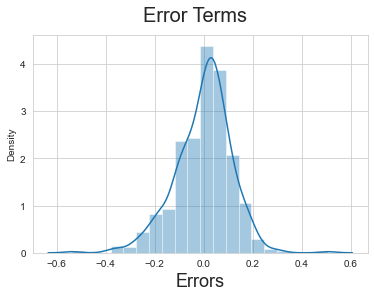

In [121]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)# Plot heading 
plt.xlabel('Errors', fontsize = 18)       # X-Label

The error terms of the latest model (lm) gives a normal distribution with mean around 0.

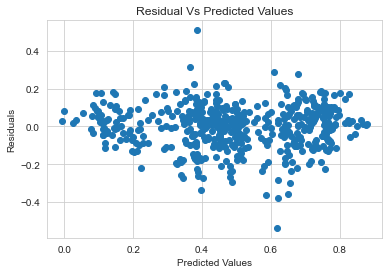

In [122]:
# Looking for patterns in the residuals

#plt.scatter(np.arange(0,len(X_train_sm),1), res)
plt.scatter(y_train_count,res)
plt.title('Residual Vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

- No Specific pattern observed inthe Error Terms with respect to Prediction
- Hence, Error terms are independent of each other.

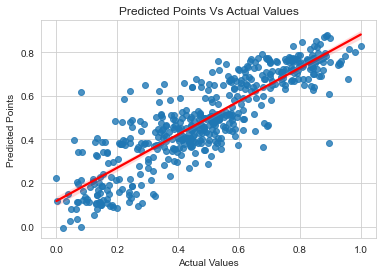

In [123]:
# Looking for patterns in the residuals

#plt.scatter(np.arange(0,len(X_train_sm),1), res)
sns.regplot(x=y_train, y=y_train_count,line_kws={"color": "red"})
plt.title('Predicted Points Vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Points')
plt.show()

- Error Terms have approximately a constant variance. 
- Hence follow Assumption of Homoscedasticity

### Making predictions using final model

In [124]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,Spring,...,October,September,Mon,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist
185,0,0,1,30.613347,59.0417,8.459286,1031,3634,4665,0,...,0,0,0,0,0,1,0,0,0,0
639,1,0,1,24.224153,87.1667,6.999825,315,4324,4639,0,...,1,0,0,0,0,1,0,0,1,0
300,0,0,1,13.564153,58.5833,15.375093,456,3291,3747,0,...,1,0,0,0,1,0,0,0,0,1
222,0,0,1,29.417500,42.3750,11.041332,812,3980,4792,0,...,0,0,0,1,0,0,0,0,0,0
153,0,0,1,25.420000,35.4167,16.959107,898,4414,5312,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,68.7917,11.791732,318,2629,2947,1,...,0,0,0,0,0,0,1,0,0,1
418,1,0,1,18.620847,55.4583,12.791171,516,4546,5062,1,...,0,0,0,1,0,0,0,0,0,0
128,0,0,1,21.832500,58.8750,11.792000,664,3698,4362,0,...,0,0,0,0,0,0,0,1,0,0
396,1,0,1,19.235847,50.7917,12.667489,304,4275,4579,1,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_test[var].head()

,temp,hum,windspeed,casual,registered,cnt
185,30.613347,59.0417,8.459286,1031,3634,4665
639,24.224153,87.1667,6.999825,315,4324,4639
300,13.564153,58.5833,15.375093,456,3291,3747
222,29.417500,42.3750,11.041332,812,3980,4792
153,25.420000,35.4167,16.959107,898,4414,5312


In [126]:

# Applying scaling **transform** on the test set

df_test[var] = scaler.transform(df_test[var])

df_test.head()




,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,Spring,...,October,September,Mon,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist
185,0,0,1,0.856704,0.519634,0.180484,0.300500,0.492802,0.511167,0,...,0,0,0,0,0,1,0,0,0,0
639,1,0,1,0.662528,0.882733,0.133655,0.089974,0.598469,0.508028,0,...,1,0,0,0,0,1,0,0,1,0
300,0,0,1,0.338555,0.513716,0.402389,0.131432,0.440276,0.400338,0,...,1,0,0,0,1,0,0,0,0,1
222,0,0,1,0.820361,0.304464,0.263333,0.236107,0.545789,0.526500,0,...,0,0,0,1,0,0,0,0,0,0
153,0,0,1,0.698871,0.214632,0.453215,0.261394,0.612251,0.589279,0,...,0,0,0,0,1,0,0,0,0,0


In [127]:
# Splitting the dataset into X and y data:

y_test = df_test.pop('cnt')
X_test = df_test

In [128]:
print(y_test.head())
print(X_test.head())

185    0.511167
639    0.508028
300    0.400338
222    0.526500
153    0.589279
Name: cnt, dtype: float64
     yr  holiday  workingday      temp       hum  windspeed    casual  \
185   0        0           1  0.856704  0.519634   0.180484  0.300500   
639   1        0           1  0.662528  0.882733   0.133655  0.089974   
300   0        0           1  0.338555  0.513716   0.402389  0.131432   
222   0        0           1  0.820361  0.304464   0.263333  0.236107   
153   0        0           1  0.698871  0.214632   0.453215  0.261394   

     registered  Spring  Summer  ...  October  September  Mon  Sat  Sun  \
185    0.492802       0       0  ...        0          0    0    0    0   
639    0.598469       0       0  ...        1          0    0    0    0   
300    0.440276       0       0  ...        1          0    0    0    1   
222    0.545789       0       0  ...        0          0    0    1    0   
153    0.612251       0       1  ...        0          0    0    0    1   

    

In [129]:
X_test[X.columns]

,yr,holiday,windspeed,Spring,Winter,November,September,Tues,Light rain,Mist
185,0,0,0.180484,0,0,0,0,0,0,0
639,1,0,0.133655,0,1,0,0,0,1,0
300,0,0,0.402389,0,1,0,0,0,0,1
222,0,0,0.263333,0,0,0,0,0,0,0
153,0,0,0.453215,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
400,1,0,0.287411,1,0,0,0,1,0,1
418,1,0,0.319480,1,0,0,0,0,0,0
128,0,0,0.287420,0,0,0,0,0,0,0
396,1,0,0.315511,1,0,0,0,0,0,0


In [130]:
# Adding constant variable to test dataframe
X_test_new = X_test[X.columns]
X_test_new = sm.add_constant(X_test_new)

In [131]:
X_test_new.head()

,const,yr,holiday,windspeed,Spring,Winter,November,September,Tues,Light rain,Mist
185,1.0,0,0,0.180484,0,0,0,0,0,0,0
639,1.0,1,0,0.133655,0,1,0,0,0,1,0
300,1.0,0,0,0.402389,0,1,0,0,0,0,1
222,1.0,0,0,0.263333,0,0,0,0,0,0,0
153,1.0,0,0,0.453215,0,0,0,0,0,0,0


In [132]:
# Making predictions:
y_test_pred = lr_sm6.predict(X_test_new)

In [133]:
y_test_pred.head()

185    0.513546
639    0.448589
300    0.354471
222    0.501366
153    0.473451
dtype: float64

##### QQ Plot

In [134]:
lr_sm6.resid

626    0.027706
364    0.059923
426    0.069789
728   -0.178429
482   -0.217264
         ...   
579    0.166613
53    -0.048487
351   -0.165991
80    -0.207805
521    0.013537
Length: 510, dtype: float64

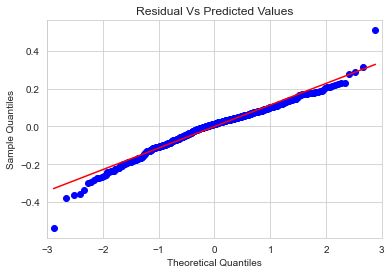

In [135]:
import statsmodels.api as sm

fig = sm.qqplot(lr_sm6.resid,line='r' )
plt.title('Residual Vs Predicted Values')
plt.show()


#### Calculating r2 score again to validate the model

In [136]:
#import required library to calculate r2_score
from sklearn.metrics import r2_score

In [137]:
# R2 Score for Train
r2_score(y_true=y_train, y_pred=y_train_count)

0.7639212265633636

In [138]:
# R2 Score for Test
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7739748578082057

##### Rsquare on train & test sets with the final model
- Rsquared score on train set: 0.763
- Rsquared score on test set: 0.773
</br> 

Model does a decent job on test set



In [139]:
def adjusted_r2(n,p,r2):
    res=1-(1-r2)*(n-1)/(n-p-1)
    return res

In [140]:
n=X_test_new.shape[0]
p=X_test_new.shape[1]
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
adj_r2_test=adjusted_r2(n,p,r2)

In [141]:
adj_r2_test

0.7619638599139558

In [142]:
lr_sm6.rsquared_adj

0.7591901890195432

In [143]:
 lr_sm6.params.sort_values(ascending=False).index

Index(['const', 'yr', 'September', 'Winter', 'Tues', 'holiday', 'November',
       'Mist', 'windspeed', 'Spring', 'Light rain'],
      dtype='object')

In [144]:
def createFormula(output):
    result =""
    for items in lr_sm6.params.iteritems():
        if(items[0] == 'const'):
            result+=str(round(items[1],3)) + " "
        else:
           result+= '{0:+}'.format(round(items[1],3))
           result+='*' + items[0] + " "
            
    return result


In [145]:
formula = createFormula(lr_sm6.params)

In [146]:
formula

'0.54 +0.257*yr -0.067*holiday -0.147*windspeed -0.296*Spring -0.032*Winter -0.075*November +0.094*September -0.061*Tues -0.297*Light rain -0.095*Mist '

### Conclusions 

The following are the variables which are significant in predicting the demand for shared bikes.
- Year 
- holiday 
- Windspeed 
- Spring season 
- Nov & Sep months 
- Light snow/rain & Mist weather 

 $ cnt = 0.54 +0.257 * yr -0.067 * holiday -0.147 * windspeed -0.296 * Spring -0.032 * Winter -0.075 * November +0.094 * September -0.061 * Tues -0.297 * Lightrain -0.095 * Mist $